コンペの benchmark になっているスコア

In [19]:
from datetime import datetime

import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('../data/inference_terms.csv')
filepaths = []
for date in df.OpenData_96hr_End:
    date = datetime.strptime(date, '%Y/%m/%d %H:%M')

    dir_name = date.strftime('%Y-%m-%d')
    filename = date.strftime('%Y-%m-%d-%H-%M')

    filepath = f'../data/test/sat_image_2018/test/sat/{dir_name}/{filename}.fv.png'
    filepaths.append(filepath)
    
filepaths[0:5]

['../data/test/sat_image_2018/test/sat/2018-01-06/2018-01-06-15-00.fv.png',
 '../data/test/sat_image_2018/test/sat/2018-01-13/2018-01-13-15-00.fv.png',
 '../data/test/sat_image_2018/test/sat/2018-01-20/2018-01-20-15-00.fv.png',
 '../data/test/sat_image_2018/test/sat/2018-01-27/2018-01-27-15-00.fv.png',
 '../data/test/sat_image_2018/test/sat/2018-02-03/2018-02-03-15-00.fv.png']

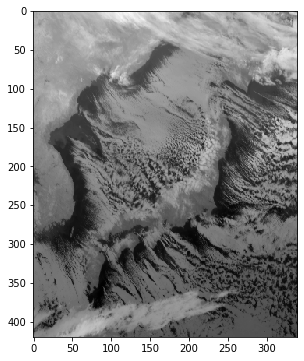

In [23]:
def read_img(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = img[40:40+420, 130:130+340]
    return img

fig = plt.figure(figsize=(6, 6))
plt.imshow(read_img(filepaths[-1]), cmap='gray')

In [24]:
images = []
for filepath in filepaths:
    images.append(np.vstack([read_img(filepath) for i in range(4)]))

images = np.vstack(images)
images.shape

(84000, 340)

In [26]:
submit = pd.DataFrame(images)
# submit.to_csv('sub.csv', header=False)
submit.head()

,0,1,2,3,4,5,6,7,8,9,...,330,331,332,333,334,335,336,337,338,339
0,167,167,166,169,171,167,168,168,166,166,...,188,195,194,199,203,203,198,195,193,197
1,166,170,162,167,168,166,167,169,165,164,...,191,195,192,190,200,199,196,192,188,191
2,168,170,164,160,166,166,167,168,167,164,...,197,197,192,185,195,194,193,188,188,186
3,169,171,163,157,167,166,166,166,165,163,...,194,196,190,186,184,184,187,186,183,178
4,168,169,165,162,168,167,165,164,163,162,...,194,186,188,183,179,175,169,177,175,170
